In [1]:
from IPython import get_ipython
from IPython.display import display

In [2]:
!pip install tensorflow
!pip install keras
!pip install kaggle

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter
from google.colab import files
import os
import pathlib

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/CollabData/kaggle_API/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/CollabData/kaggle_API/kaggle.json': No such file or directory


In [6]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
! kaggle datasets download cakrulgaming/indonesia-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/cakrulgaming/indonesia-traffic-sign
License(s): unknown
 88% 79.0M/89.9M [00:00<00:00, 111MB/s]
100% 89.9M/89.9M [00:00<00:00, 120MB/s]


In [11]:
! unzip indonesia-traffic-sign.zip

Archive:  indonesia-traffic-sign.zip
replace traffic_sign/test/lampu-hijau/lampu hijau (100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (100).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (100).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (71).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (71).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (72).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (72).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (73).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (73).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (74).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (74).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (75).jpg  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (75).txt  
  inflating: traffic_sign/test/lampu-hijau/lampu hijau (76).jpg  
  

In [15]:
# Create an ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the training and testing datasets
train_generator = train_datagen.flow_from_directory(
    '/content/traffic_sign/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/traffic_sign/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1470 images belonging to 21 classes.
Found 630 images belonging to 21 classes.


In [16]:
# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Determine the number of classes (sports ball types) in your dataset
num_classes = 21

# Add a new classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(num_classes, activation='softmax')(x) # num_classes is now defined

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.1648 - loss: 2.9054 - val_accuracy: 0.4539 - val_loss: 1.8398
Epoch 2/10
 1/45 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6250 - loss: 1.6091

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


45/45 ━━━━━━━━━━━━━━━━━━━━ 26s 572ms/step - accuracy: 0.6250 - loss: 1.6091 - val_accuracy: 0.4720 - val_loss: 1.8133
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - accuracy: 0.6491 - loss: 1.3057 - val_accuracy: 0.5839 - val_loss: 1.4294
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 27s 564ms/step - accuracy: 0.5938 - loss: 1.3011 - val_accuracy: 0.5822 - val_loss: 1.4471
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.7731 - loss: 0.8643 - val_accuracy: 0.6184 - val_loss: 1.2978
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 898ms/step - accuracy: 0.7812 - loss: 0.8214 - val_accuracy: 0.6332 - val_loss: 1.2929
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.8101 - loss: 0.7219 - val_accuracy: 0.6398 - val_loss: 1.2170
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 888ms/step - accuracy: 0.7812 - loss: 0.5830 - val_accuracy: 0.6299 - val_loss: 1.2359
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8500 - loss: 0.5845 - val_accuracy: 0.6316 - val_lo

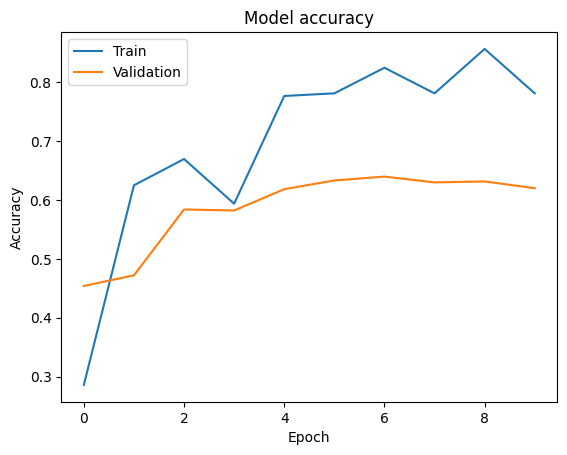

In [18]:
# Plot training accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Save the model
model.save('sports_ball_classifier.h5')

In [19]:
def predict_image(img_path, class_names):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.

    prediction = model.predict(img)
    predicted_class_index = np.argmax(prediction)

    # Map predicted_class_index to the corresponding sports ball type
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name  # Return the class name

In [20]:
class_names = list(train_generator.class_indices.keys())

In [21]:
    uploaded = files.upload()

    for fn in uploaded.keys():
      # predicting images
      path = fn
      img = image.load_img(path, target_size=(224,224))
      predicted_class_name = predict_image(path, class_names) # Call the function here
      print(f"The predicted class for {fn} is: {predicted_class_name}")

Saving ajefajfa.jpg to ajefajfa.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
The predicted class for ajefajfa.jpg is: peringatan-simpang-tiga-sisi-kiri
